# load and convert matlab images
there are different ways to load and convert matlab images. Depending on the version of matlab that was used to create them, use one of the two versions below:

In [15]:
import scipy.io

filepath = "/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/2015_BOE_Chiu/Subject_01.mat"
mat = scipy.io.loadmat(filepath)

or

In [ ]:
import numpy as np
import h5py
f = h5py.File(filepath,'r')
print(f.keys())
# data = f.get('AMD_NSR_maps')
# data = np.array(data) # For converting to a NumPy array

Conversion for 2015_BOE_CHIU

In [63]:
import matplotlib.pyplot as plt
import pathlib
from PIL import Image
from scipy import ndimage
import os

filepaths = list(pathlib.Path("/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/2015_BOE_Chiu/").glob("*.mat"))

for filepath in filepaths:
    mat = scipy.io.loadmat(filepath)['images']
    subject = filepath.stem
    for image_idx in range(mat.shape[-1]):
        img_array = mat[:,:,image_idx]
        directory = filepaths[0].parent / subject

        # white_pixels = (img_array == 255)
        # # Use binary erosion to identify the external white border
        # border = ndimage.binary_erosion(white_pixels, border_value=1, structure=np.ones((3,3)))
        # # Create a mask that includes the border and one pixel inward
        # border = ndimage.binary_dilation(border, structure=np.ones((3,3)))
        # border = ndimage.binary_dilation(border, structure=np.ones((3,3)))
        # border = ndimage.binary_dilation(border, structure=np.ones((3,3)))

        # img_array[border] = 0

        img = Image.fromarray(img_array)
        os.makedirs(directory, exist_ok=True)
        img.save(filepaths[0].parent / subject / f"img_{image_idx}.png")


KeyboardInterrupt: 

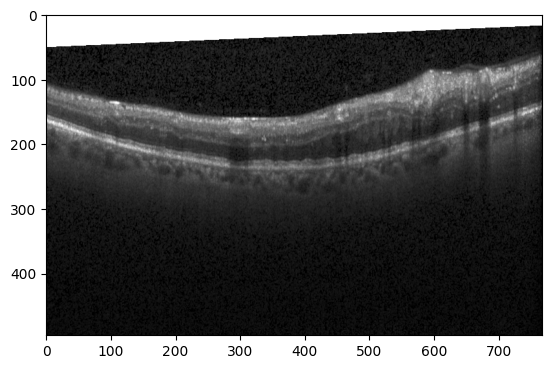

In [64]:
plt.imshow(mat[:,:,9], cmap='gray', vmin=0, vmax=255)
plt.show()

In [72]:
# code from the read_data.py file from the NEH_UT_2021
import pandas as pd
import cv2
from pathlib import Path

def read_all_images(file_path, csv_path):
    df = pd.read_csv(csv_path)
    
    X_patient = []
    y_patient = []
    
    for patient_class in np.unique(df['Class']):
        df_classwise = df[df['Class'] == patient_class]
        
        for patient_index in np.unique(df_classwise['Patient ID']):
            X = []
            y = []
            df_patientwise = df_classwise[df_classwise['Patient ID'] == patient_index]
            
            for i in range(len(df_patientwise)):
                patient_path = Path(df_patientwise.iloc[i]['Directory'])
                file_path = Path(file_path)
                # img = cv2.imread(str(file_path / patient_path))
                # # img = cv2.resize(img, (imageSize, imageSize))
                # img = np.asarray(img)
                
                # X.append(img)
                if df_patientwise.iloc[i]['Label'].lower() == 'normal':
                    y.append(0)
                    
                elif df_patientwise.iloc[i]['Label'].lower() == 'drusen':
                    y.append(1)
                    
                elif df_patientwise.iloc[i]['Label'].lower() == 'cnv':
                    y.append(2)
                    
            X_patient.append(file_path)
            y_patient.append(y)

    return X_patient, y_patient

csv_path = "/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/data_information.csv"
file_path = "/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset"

x_patient, y_patient = read_all_images(file_path, csv_path)

[ WARN:0@1031.686] global loadsave.cpp:248 findDecoder imread_('/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/DRUSEN/59/000_NOrmal.tif'): can't open/read file: check file path/integrity
[ WARN:0@1031.779] global loadsave.cpp:248 findDecoder imread_('/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/DRUSEN/59/004_NOrmal.tif'): can't open/read file: check file path/integrity
[ WARN:0@1031.788] global loadsave.cpp:248 findDecoder imread_('/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/DRUSEN/59/005_NOrmal.tif'): can't open/read file: check file path/integrity
[ WARN:0@1031.797] global loadsave.cpp:248 findDecoder imread_('/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/NEH_UT_2021RetinalOCTDataset/NEH_UT_2021RetinalOCTDataset/DRUSEN/59/006_NOrmal.tif'): can't open/read file

In [3]:
from fundus_oct_challenge.datasets.combined_dataset import CombinedOCTDataset

ds = CombinedOCTDataset(root_dir="/mnt/mass_storage/master_ai/retinal_oct_dataset_collection", 
                        mode='train', 
                        datasets=['GOALS', "kermany2018", "neh_ut_2021", '2015_BOE_CHIU', 'OCTID'])

loading goals


In [3]:
len(ds.dataset_paths['octid']['labels'])

KeyError: 'labels'

In [2]:
len(ds.dataset_paths['octid']['images'])

100

In [9]:
ds.dataset_paths['octid']['images'][4]

'/mnt/mass_storage/master_ai/retinal_oct_dataset_collection/OCTID/NORMAL12.jpeg'

In [10]:
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
[1,1] + [2,2]

[1, 1, 2, 2]